##When to use Standardization?

Algo               :- Reason of applying feature scaling

K-Means            :- Use the euclidean distance measure

KNN                :- Measure the distance between pairs of samples and these distances are influenced by the measurement units

Principal component Analysis(PCA) :- Try to get the feature with maximum variance

ANN:- Apply gradient Descent

Gradient Descent :- Thets caluclation become faster after feature scaling and the learning rate in the update equation of Stochastic gradient descent is the same for every parameter

## When Not use Standardization?

Decision Tree

Random forest

Gradient boost

XGboost

Note:- Outlier will still same in data after applying Standardization

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
114,15739160,Male,42,80000,0
210,15724536,Female,48,96000,1
95,15709441,Female,35,44000,0
327,15785170,Female,42,75000,0
124,15678168,Female,41,51000,0


In [4]:
df=df.iloc[:,2:]

In [5]:
df.shape

(400, 3)

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=0)

In [8]:
X_train.shape

(320, 2)

In [9]:
X_test.shape

(80, 2)

##StandardScaler

Good practise to used it after train test split



In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [11]:
#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
scaler.mean_

array([3.8218750e+01, 6.9928125e+04])

Cons:-
it's always return numpy.array

In [13]:
X_train_scaled

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

converting to pandas dataframe

In [14]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [15]:
X_train_scaled

,Age,EstimatedSalary
0,1.922950,2.146016
1,2.020161,0.378719
2,-1.382215,-0.432499
3,-1.187794,-1.011940
4,1.922950,-0.925024
...,...,...
315,0.950843,-1.156800
316,-0.896162,-0.780164
317,-0.215686,-0.519415
318,-1.090583,-0.461471


In [16]:
import numpy as np
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,38.2,69928.1
std,10.3,34570.1
min,18.0,15000.0
25%,30.0,43000.0
50%,38.0,69500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
import numpy as np
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-1.6
25%,-0.8,-0.8
50%,-0.0,-0.0
75%,0.8,0.5
max,2.1,2.3


In comparasion image we can see our data is more ceneric

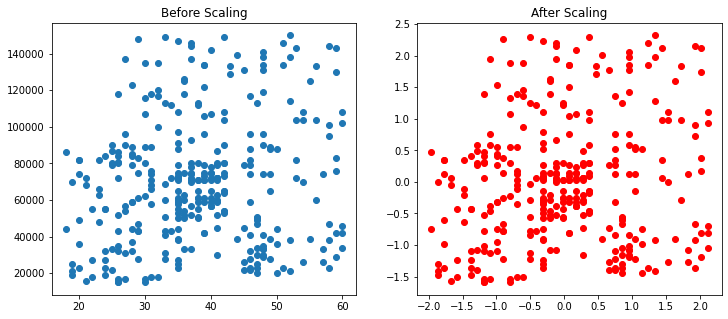

In [18]:
import matplotlib.pyplot  as plt


fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

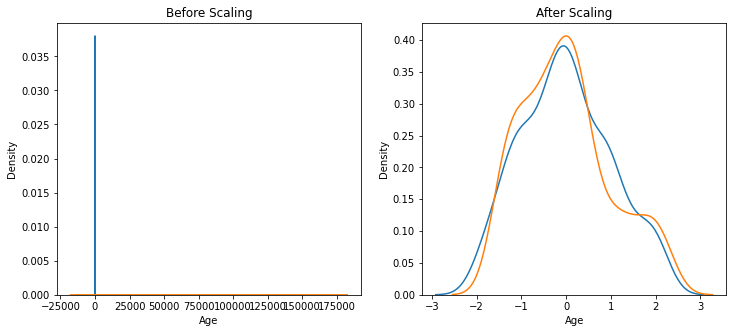

In [19]:
import seaborn as sns
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

Comparasion of distribution 

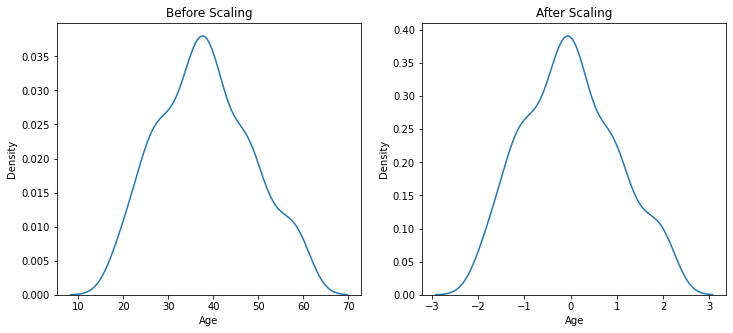

In [20]:
import seaborn as sns
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
#before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)


ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

Why Scaling is important?

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()
lr_scaled= LogisticRegression()

In [23]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print("Actual Data without Scaling:-",accuracy_score(y_test,y_pred))
print("Actual Data with Scaling:-",accuracy_score(y_test,y_pred_scaled))

Actual Data without Scaling:- 0.725
Actual Data with Scaling:- 0.925


In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

In [29]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [30]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [31]:
print("Actual Data without Scaling:-",accuracy_score(y_test,y_pred))
print("Actual Data with Scaling:-",accuracy_score(y_test,y_pred_scaled))

Actual Data without Scaling:- 0.9125
Actual Data with Scaling:- 0.9125


In [32]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [33]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

In [34]:
df.describe()

,Age,EstimatedSalary,Purchased
count,403.000000,403.000000,403.000000
mean,37.846154,70714.640199,0.359801
std,11.255343,37959.790969,0.480539
min,5.000000,1000.000000,0.000000
25%,29.500000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,95.000000,350000.000000,1.000000


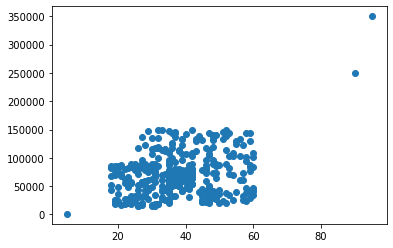

In [35]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [36]:
from sklearn.model_selection import train_test_split 

In [37]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=0)

In [38]:
X_train.shape

(322, 2)

In [39]:
X_test.shape

(81, 2)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

StandardScaler()

In [41]:
#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
scaler.mean_

array([3.83478261e+01, 6.97236025e+04])

In [43]:
X_train_scaled

array([[-1.32640342,  0.40563768],
       [-0.21704783,  1.37168537],
       [ 1.26209295,  0.57611668],
       [ 1.90921704,  0.37722451],
       [-1.32640342, -0.41834418],
       [-0.77172562,  0.49087718],
       [-0.21704783,  1.57057755],
       [ 0.15273736,  1.05914053],
       [-1.04906452,  0.74659569],
       [ 0.06029106, -0.78771536],
       [ 0.70741515,  0.121506  ],
       [ 0.89230775,  0.57611668],
       [ 0.79986145, -0.64564953],
       [ 0.98475405, -1.18549971],
       [ 0.15273736,  0.14991917],
       [-0.12460153,  0.291985  ],
       [-1.41884971, -0.61723636],
       [-1.23395712, -1.04343387],
       [ 0.98475405, -0.95819437],
       [ 0.33762996,  0.97390103],
       [-1.14151082, -0.98660754],
       [ 0.79986145, -0.7593022 ],
       [-0.12460153,  0.00785333],
       [ 0.52252256, -0.87295487],
       [-0.12460153,  2.16725407],
       [-0.58683303,  1.42851171],
       [ 1.35453925,  0.97390103],
       [ 0.70741515,  0.34881134],
       [ 1.81677074,

In [44]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [45]:
X_train_scaled

,Age,EstimatedSalary
0,-1.326403,0.405638
1,-0.217048,1.371685
2,1.262093,0.576117
3,1.909217,0.377225
4,-1.326403,-0.418344
...,...,...
317,0.892308,-1.128673
318,-0.864172,-0.759302
319,-0.217048,-0.503584
320,-1.049065,-0.446757


In [46]:
import numpy as np
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,322.0,322.0
mean,38.3,69723.6
std,10.8,35249.7
min,5.0,1000.0
25%,30.0,43000.0
50%,37.5,70000.0
75%,46.0,88000.0
max,90.0,250000.0


In [47]:
import numpy as np
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,322.0,322.0
mean,-0.0,-0.0
std,1.0,1.0
min,-3.1,-2.0
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,4.8,5.1


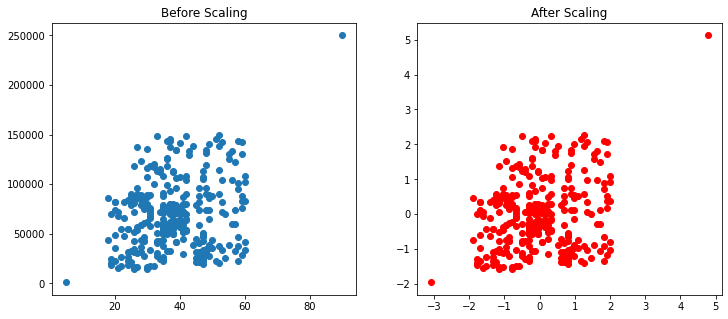

In [48]:
import matplotlib.pyplot  as plt


fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()